## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [69]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sb
sb.set_style('darkgrid')

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [6]:
petrol=pd.read_csv('petrol.csv')
petrol

,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [11]:
petrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
tax             48 non-null float64
 income         48 non-null int64
 highway        48 non-null int64
 dl             48 non-null float64
 consumption    48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [12]:
petrol.describe()

,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

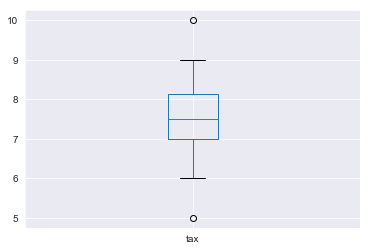

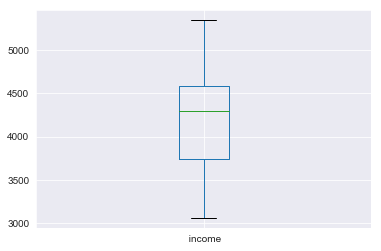

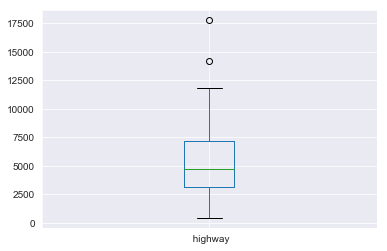

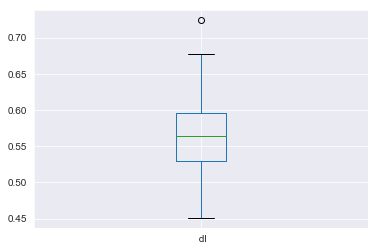

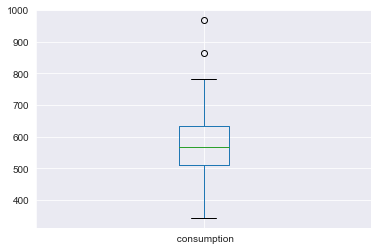

In [8]:
for i in petrol.columns:
    petrol[i].plot(kind='box')
    plt.show()

In [9]:
petrol.columns

Index(['tax', ' income', ' highway', ' dl', ' consumption'], dtype='object')

In [10]:
petrol.shape

(48, 5)

In [13]:
q1=petrol['tax'].quantile(0.25)
q3=petrol['tax'].quantile(0.75)
IQR=q3-q1
uo=q3+1.5*IQR
lo=q1-1.5*IQR
petrol=petrol.loc[(petrol['tax']>lo)&(petrol['tax']<uo)]

In [19]:
q1=petrol[' highway'].quantile(0.25)
q3=petrol[' highway'].quantile(0.75)
IQR=q3-q1
uo=q3+1.5*IQR
lo=q1-1.5*IQR
petrol=petrol.loc[(petrol[' highway']>lo)&(petrol[' highway']<uo)]

In [21]:
q1=petrol[' dl'].quantile(0.25)
q3=petrol[' dl'].quantile(0.75)
IQR=q3-q1
uo=q3+1.5*IQR
lo=q1-1.5*IQR
petrol=petrol.loc[(petrol[' dl']>lo)&(petrol[' dl']<uo)]

In [23]:
q1=petrol[' consumption'].quantile(0.25)
q3=petrol[' consumption'].quantile(0.75)
IQR=q3-q1
uo=q3+1.5*IQR
lo=q1-1.5*IQR
petrol=petrol.loc[(petrol[' consumption']>lo)&(petrol[' consumption']<uo)]

In [24]:
petrol.shape

(42, 5)

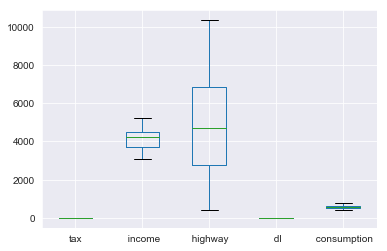

In [25]:
petrol.plot(kind='box')

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [26]:
petrol.corr()

,tax,income,highway,dl,consumption
tax,1.000000,-0.133841,-0.443926,-0.316342,-0.463247
income,-0.133841,1.000000,-0.076862,0.296002,-0.254464
highway,-0.443926,-0.076862,1.000000,0.133983,0.215182
dl,-0.316342,0.296002,0.133983,1.000000,0.549161
consumption,-0.463247,-0.254464,0.215182,0.549161,1.000000


### We can see that tax and dl have a stronger association with consumption

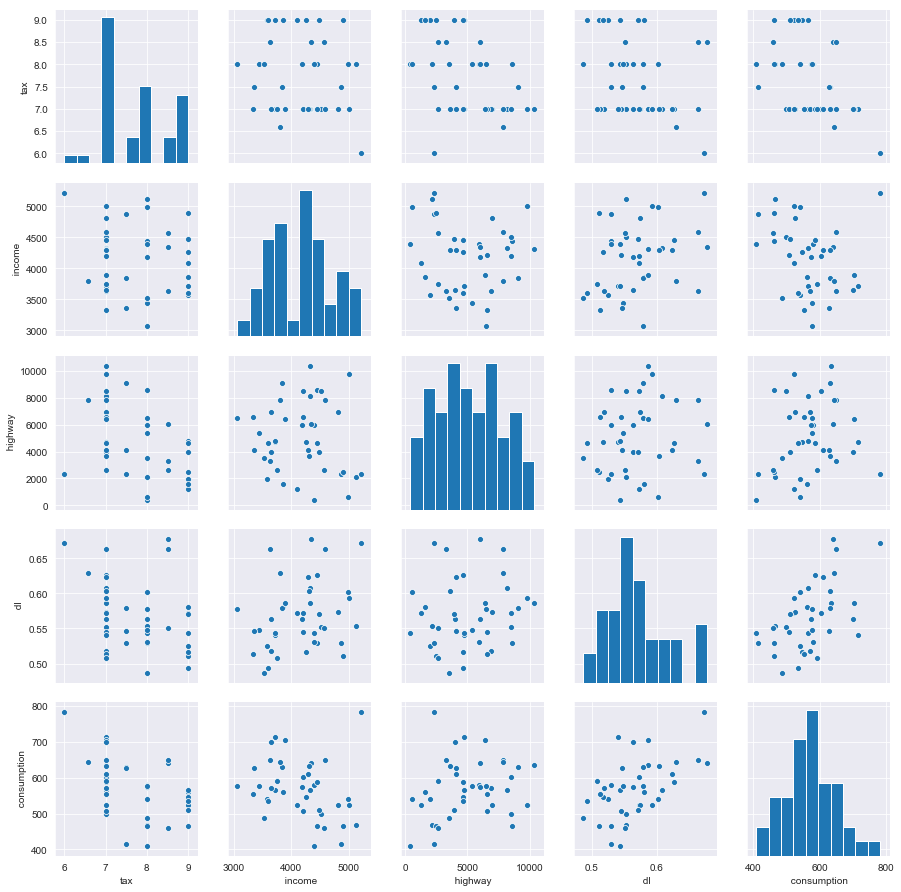

In [27]:
sb.pairplot(petrol)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


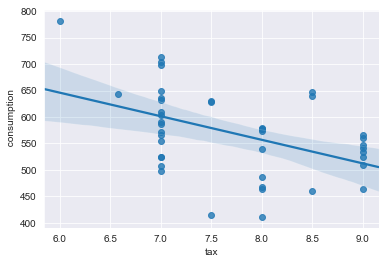

In [29]:
sb.regplot(x='tax',y=' consumption',data=petrol)

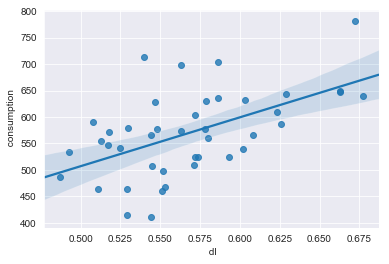

In [31]:
sb.regplot(x=' dl',y=' consumption',data=petrol)

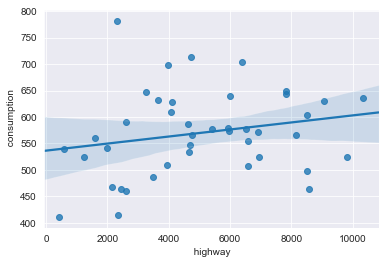

In [34]:
sb.regplot(x=' highway',y=' consumption',data=petrol)

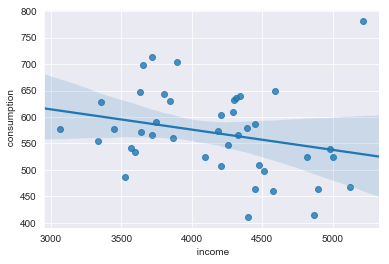

In [35]:
sb.regplot(x=' income',y=' consumption',data=petrol)

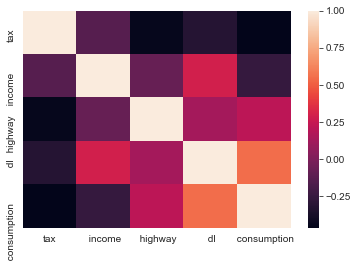

In [33]:
sb.heatmap(petrol.corr())

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [36]:
petrol.describe()

,tax,income,highway,dl,consumption
count,42.000000,42.000000,42.000000,42.000000,42.000000
mean,7.704286,4159.880952,5051.214286,0.568262,570.000000
std,0.838751,535.481830,2602.905558,0.047926,80.636492
min,6.000000,3063.000000,431.000000,0.487000,410.000000
25%,7.000000,3718.750000,2782.750000,0.532500,524.000000
50%,7.500000,4232.500000,4705.500000,0.563000,568.500000
75%,8.375000,4469.250000,6827.250000,0.591250,630.250000
max,9.000000,5215.000000,10340.000000,0.677000,782.000000


In [37]:
X=petrol.loc[:,['tax',' dl']]
y=petrol.loc[:,[' consumption']]

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [55]:
trainX,testX,trainy,testy=train_test_split(X,y,test_size=0.2,random_state=4)

In [39]:
trainX.shape

(33, 2)

In [40]:
testX.shape

(9, 2)

# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [91]:
cof=pd.DataFrame({'coefficients':[m3],'X.columns':['tax',' income',' highway',' dl']})

ValueError: arrays must all be same length

In [86]:
model2.coef_

array([[-4.63096630e+01, -8.82587793e-02, -2.82047803e-03,
         1.12122336e+03]])

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [73]:
lreg=LinearRegression()
model1=lreg.fit(trainX,trainy)
m1=model1.score(testX,testy)
m1

0.2597900069251393

In [42]:
model1.coef_

array([[-37.98383558, 725.31311115]])

In [44]:
model1.intercept_

array([458.26977313])

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features. Find R2 Score


In [50]:
nX=petrol.loc[:,['tax',' income',' highway',' dl']]
ny=petrol.loc[:,[' consumption']]

In [51]:
trainnX,testnX,trainny,testny=train_test_split(nX,ny,test_size=0.2,random_state=4)

In [52]:
lregr=LinearRegression()
model2=lregr.fit(trainnX,trainny)
m2=model2.score(testnX,testny)
m2

0.2279012624264578

In [58]:
acc=pd.DataFrame({'model':['2 feature Regression','4 feature Regression'],'accuracy':[m1,m2]})

In [59]:
acc

,model,accuracy
0,2 feature Regression,0.259790
1,4 feature Regression,0.227901


In [66]:
preds=model2.predict(testnX)
preds

array([[718.75600895],
       [547.50323749],
       [525.88180959],
       [641.23324715],
       [664.73196029],
       [449.74246976],
       [667.6148503 ],
       [548.40983683],
       [392.927179  ]])

In [79]:
mse=mean_squared_error(preds,testny)
mse

4962.879107625491

In [80]:
rmse=np.sqrt(mse)
rmse

70.44770477187664

# Question 9: Print the coefficients of the multilinear regression model

In [89]:
m3=pd.DataFrame(model2.coef_)

In [90]:
m3

,0,1,2,3
0,-46.309663,-0.088259,-0.00282,1121.223359


In [62]:
model2.intercept_

array([675.87960214])

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer